In [1]:
import os
from pathlib import Path
import PIL
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense, Dropout,Input, Add, ReLU, GlobalAveragePooling2D, MaxPooling2D

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

SEED = 15
IMAGE_SIZE = 64
BATCH_SIZE = 64

In [3]:
train_dir = Path('Cricketinshorts')
test_dir = Path('CricketTest')


In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  zoom_range = 0.2,
                                  brightness_range = [0.2,1.0],
                                  validation_split = 0.15)

test_datagen = ImageDataGenerator(rescale=1./255)
#datagen = ImageDataGenerator(width_shift_range=[-200,200])
#datagen = ImageDataGenerator(height_shift_range=0.5)
#datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
#datagen = ImageDataGenerator(zoom_range=[0.5,1.0])

In [11]:


Target_Size = (227,227)

# Generate Train Data
train_data = train_datagen.flow_from_directory(
        train_dir,
        target_size=Target_Size,
        batch_size=64,
        shuffle = True,
        subset='training',
        class_mode='categorical')

# Generate Validation data
val_data = train_datagen.flow_from_directory(
        train_dir,
        target_size=Target_Size,
        shuffle = True,
        batch_size=64,
        subset='validation',
        class_mode='categorical')


labels = train_data.class_indices

classes = list(labels)

X,y = next(iter(train_data))

Found 9737 images belonging to 5 classes.
Found 1715 images belonging to 5 classes.


In [10]:
#data_augmentation = tf.keras.Sequential([
  #layers.RandomZoom(height_factor = (0.1,0.3), width_factor= (0.1,0.3)),
  #layers.RandomTranslation(height_factor = 0.4, width_factor = 0.4),
#])

In [61]:
#data_augmentation = tf.keras.Sequential([
  #layers.experimental.preprocessing.RandomZoom(height_factor = (0.1,0.3), width_factor= (0.1,0.3)),
  #layers.experimental.preprocessing.RandomTranslation(height_factor = 0.4, width_factor = 0.4),
  
#])

In [62]:
#aug_ds = train_ds.map(
  #lambda x, y: (resize_and_rescale(x, training=True), y))

In [63]:
#train_data = train_data.map(
    #lambda X, y: (data_augmentation(X, training=True), y)
#).prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
# Generate Test Data
test_list = tf.io.gfile.listdir('CricketTest/')
test_data = []
for f in test_list:
    img = tf.keras.preprocessing.image.load_img('CricketTest/' + f, color_mode = "rgb", target_size = Target_Size)
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img/255
    test_data.append(img)

In [13]:
model = Sequential([
    Conv2D(filters=96, kernel_size=(11,11), strides = (4,4), activation='relu', input_shape=(227,227,3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=256, kernel_size=(5,5), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=384, kernel_size=(3,3), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=384, kernel_size=(3,3), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(2048, activation='relu'),
    Dropout(0.5),
    Dense(2048, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

In [27]:
from tensorflow.keras.layers import ZeroPadding2D

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       8

In [16]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history = model.fit(train_data, validation_data=val_data, epochs = 10, callbacks=callback, shuffle = True)

Epoch 1/10
153/153 [==============================] - 1427s 9s/step - loss: 3.0133 - accuracy: 0.3930 - val_loss: 1.4652 - val_accuracy: 0.3429
Epoch 2/10
153/153 [==============================] - 1555s 10s/step - loss: 1.2526 - accuracy: 0.5337 - val_loss: 1.4515 - val_accuracy: 0.3878
Epoch 3/10
153/153 [==============================] - 1371s 9s/step - loss: 1.1718 - accuracy: 0.5610 - val_loss: 1.1779 - val_accuracy: 0.5697
Epoch 4/10
153/153 [==============================] - 1274s 8s/step - loss: 1.1203 - accuracy: 0.5850 - val_loss: 1.5092 - val_accuracy: 0.4012
Epoch 5/10
153/153 [==============================] - 1136s 7s/step - loss: 1.1132 - accuracy: 0.5888 - val_loss: 1.2053 - val_accuracy: 0.5184
Epoch 6/10
153/153 [==============================] - 1038s 7s/step - loss: 1.0797 - accuracy: 0.5997 - val_loss: 1.8419 - val_accuracy: 0.3983
Epoch 7/10
153/153 [==============================] - 1026s 7s/step - loss: 1.0628 - accuracy: 0.6097 - val_loss: 2.1684 - val_accuracy

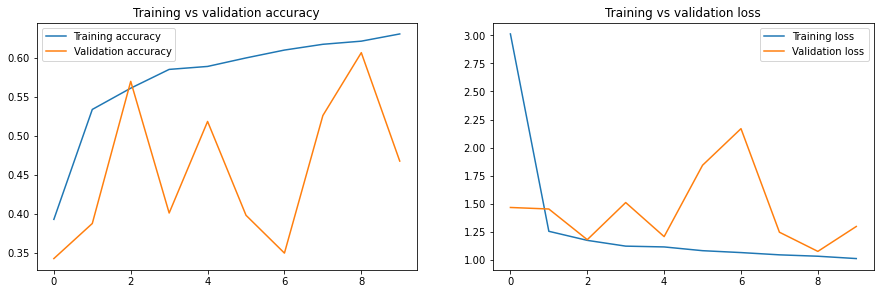

In [17]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [18]:
pred_7 = model.predict(tf.convert_to_tensor(test_data))
pred7 = np.argmax(pred_7, axis = 1)
pred7

array([3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       1, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 3, 3, 3, 3, 3, 1, 0, 0, 1, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 4, 3, 4, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3,
       3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 1, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 0, 0, 3, 0, 3, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1],
      dtype=int64)

In [19]:
df = pd.read_csv('test_latest.csv')

In [20]:
df['Class'] = pred7
df

,Image_ID,Class
0,test0.jpg,3
1,test1.jpg,3
2,test2.jpg,3
3,test3.jpg,1
4,test4.jpg,1
...,...,...
278,test278.jpg,3
279,test279.jpg,3
280,test280.jpg,3
281,test281.jpg,3


In [21]:
df[df['Class']==0]

,Image_ID,Class
23,test23.jpg,0
31,test31.jpg,0
32,test32.jpg,0
44,test44.jpg,0
45,test45.jpg,0
52,test52.jpg,0
53,test53.jpg,0
59,test59.jpg,0
60,test60.jpg,0
141,test141.jpg,0


In [ ]:
df.to_csv('submit.csv', index=False)
submit

In [37]:
model_new = Sequential([
    #Convolution layer 1
    Conv2D(filters=96, kernel_size=(11,11), strides = (4,4), activation='relu', input_shape=(227,227,3)),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    ZeroPadding2D((2, 2)),
    layers.Lambda(tf.nn.local_response_normalization),
    layers.Lambda(tf.nn.local_response_normalization),
    
    #Convolution layer 2
    Conv2D(filters=256, kernel_size=(5,5), activation='relu'),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    ZeroPadding2D((1, 1)),
    
    #Convolution layer 3
    Conv2D(filters=384, kernel_size=(3,3), activation='relu'),
    ZeroPadding2D((1, 1)),
    layers.Lambda(tf.nn.local_response_normalization),
    layers.Lambda(tf.nn.local_response_normalization),
    
    #Convolution layer 4
    Conv2D(filters=384, kernel_size=(3,3), activation='relu'),
    ZeroPadding2D((1, 1)),
    layers.Lambda(tf.nn.local_response_normalization),
    layers.Lambda(tf.nn.local_response_normalization),
    
    #Convolution layer 5
    Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(3,3), strides=(2,2))
    ])


    
    
#conv_2_1 = Sequential([Conv2D(filters=128, kernel_size=(5,5), activation='relu', padding="same")])
#conv_2_2 = Sequential([Conv2D(filters=128, kernel_size=(5,5), activation='relu', padding="same")])
#conv_2 = tf.keras.layers.Concatenate()([conv_2_1,conv_2_2])
#conv_2 = tf.concat(0, [[conv_2_1], [conv_2_2]])

#model_new.add(conv_2)




    
#conv_4_1 = Conv2D(filters=192, kernel_size=(3,3), activation='relu', padding="same")
#conv_4_2 = Conv2D(filters=192, kernel_size=(3,3), activation='relu', padding="same")
#conv_4 = tf.keras.layers.Concatenate()([conv_4_1,conv_4_2])


    
   
#conv_5_1 = Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding="same")
#conv_5_2 = Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding="same")
#conv_5 = tf.keras.layers.Concatenate()([conv_2_1,conv_2_2])


    
model_new.add(Flatten())
model_new.add(Dense(4096, activation='relu'))
model_new.add(Dropout(0.5))
model_new.add(Dense(4096, activation='relu'))
model_new.add(Dropout(0.5))
model_new.add(Dense(1000, activation='relu'))
model_new.add(Dropout(0.5))
model_new.add(Dense(512, activation='relu'))
model_new.add(Dropout(0.5))
model_new.add(Dense(128, activation='relu'))
model_new.add(Dropout(0.3))
model_new.add(Dense(5, activation='softmax'))


#Lambda(tf.nn.local_response_normalization),

In [38]:
model_new.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
zero_padding2d_8 (ZeroPaddin (None, 31, 31, 96)        0         
_________________________________________________________________
lambda_7 (Lambda)            (None, 31, 31, 96)        0         
_________________________________________________________________
lambda_8 (Lambda)            (None, 31, 31, 96)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 256)      

In [39]:
model_new.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history = model_new.fit(train_data, validation_data=val_data, epochs = 10, callbacks=callback, shuffle = True)

Epoch 1/10
153/153 [==============================] - 1119s 7s/step - loss: 1.5296 - accuracy: 0.2914 - val_loss: 1.5108 - val_accuracy: 0.3050
Epoch 2/10
153/153 [==============================] - 867s 6s/step - loss: 1.5153 - accuracy: 0.2977 - val_loss: 1.5089 - val_accuracy: 0.3050
Epoch 3/10
153/153 [==============================] - 29215s 192s/step - loss: 1.5115 - accuracy: 0.3024 - val_loss: 1.5081 - val_accuracy: 0.3050
Epoch 4/10
153/153 [==============================] - 1111s 7s/step - loss: 1.5128 - accuracy: 0.3032 - val_loss: 1.5072 - val_accuracy: 0.3050
Epoch 5/10
153/153 [==============================] - 1133s 7s/step - loss: 1.5109 - accuracy: 0.2975 - val_loss: 1.5076 - val_accuracy: 0.3050
Epoch 6/10
153/153 [==============================] - 1174s 8s/step - loss: 1.5109 - accuracy: 0.3007 - val_loss: 1.5081 - val_accuracy: 0.3050
Epoch 7/10
153/153 [==============================] - 1141s 7s/step - loss: 1.5101 - accuracy: 0.3024 - val_loss: 1.5071 - val_accurac